# Predicting Stock Prices with Recurrent Neural Networks in TensorFlow

Written by: Udbhav Prasad <br>
Linkedin: https://www.linkedin.com/in/udbhav-prasad-1506b7192/ <br>
HackerRank: https://www.hackerrank.com/uprasad1 <br>
Github: https://github.com/UdbhavPrasad072300 <br>
Computer Science Co-op - Ryerson University <br> <hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
import yfinance as yf

## Data Preprocessing

In [3]:
tsla = yf.Ticker("TSLA")

In [4]:
tsla.info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 48016,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, Netherlands, Norway, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers sedans and sport utility vehicles. It also provides electric powertrain components and systems; and services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians, as well as sells used vehicles. This segment markets and sells its products through a network of company-owned stores and galleries, as well as through its own Website. The Energy Generation and Storage segment offers energy storage products, such as rechargeable lithium-ion battery systems for use in homes, industrial, commercial facilities, and utility grids; and desig

In [5]:
hist = tsla.history(period="5Y")

<AxesSubplot:xlabel='Date'>

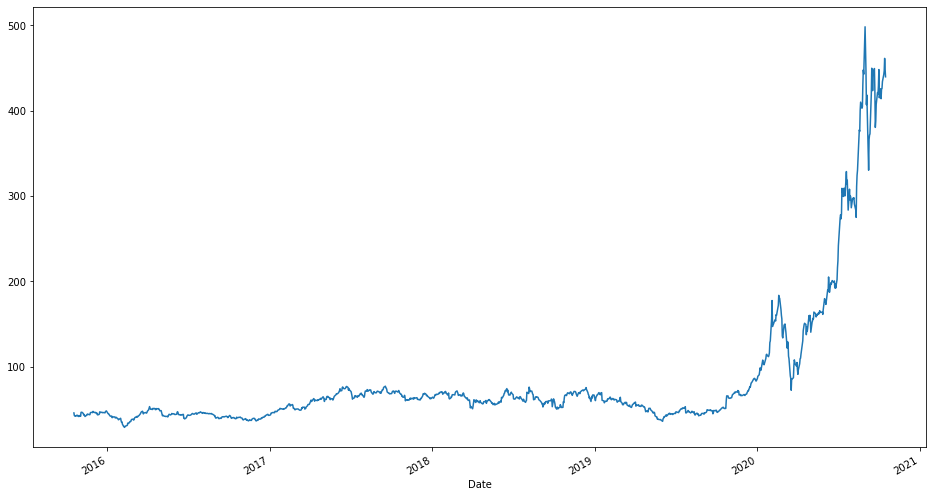

In [6]:
hist['Close'].plot(figsize=(16, 9))

In [7]:
hist.to_csv('TSLA.csv')

Importing Training Set

In [8]:
dataset_train = hist
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
len(training_set)

1259

Feature Scaling (Normalizing)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set)-200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building Recurrent Neural Network

Initializing Sequential Network

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

Compiling Recurrent Neural Network

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Training Recurrent Neural Network

In [20]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 999 samples
Epoch 1/100
 32/999 [..............................] - ETA: 2:27

UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_distributed_function_10163]

Function call stack:
distributed_function -> distributed_function -> distributed_function


## Predictions and Visualizations

In [ ]:
# Getting the stock price of 2020
dataset_test = pd.read_csv("TSLA.csv")
dataset_test = dataset_test.iloc[-200:]
len(dataset_test)

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
print(type(predicted_stock_price))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Plotting

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()